In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 1

In [7]:
%aimport src.utils.plot
import src.utils as utils

In [8]:
train = pd.read_csv('./input/application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# train.describe(include=['O'])
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


/home/arizuka/.pyenv/versions/3.6.4/envs/compe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


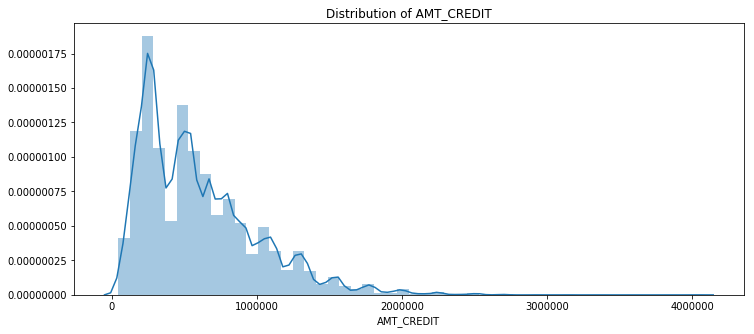

In [11]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train["AMT_CREDIT"])

In [12]:
%time print("hello")

hello
CPU times: user 860 µs, sys: 226 µs, total: 1.09 ms
Wall time: 380 µs


In [13]:
train_eda = train.head(1000)

In [14]:
train_eda.T[0]

SK_ID_CURR                                           100002
TARGET                                                    1
NAME_CONTRACT_TYPE                               Cash loans
CODE_GENDER                                               M
FLAG_OWN_CAR                                              N
FLAG_OWN_REALTY                                           Y
CNT_CHILDREN                                              0
AMT_INCOME_TOTAL                                     202500
AMT_CREDIT                                           406598
AMT_ANNUITY                                         24700.5
AMT_GOODS_PRICE                                      351000
NAME_TYPE_SUITE                               Unaccompanied
NAME_INCOME_TYPE                                    Working
NAME_EDUCATION_TYPE           Secondary / secondary special
NAME_FAMILY_STATUS                     Single / not married
NAME_HOUSING_TYPE                         House / apartment
REGION_POPULATION_RELATIVE              

In [15]:
train_corr = train.corr()
high_corr = train_corr.nlargest(30, 'TARGET')
high_corr = high_corr[high_corr.index]
high_corr.head()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,...,OBS_60_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_2,FLAG_DOCUMENT_21,LIVE_REGION_NOT_WORK_REGION,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,FLAG_MOBIL
TARGET,1.000000,0.078239,0.060893,0.058899,0.055218,0.051457,0.050994,0.045982,0.044395,0.044346,...,0.009022,0.006942,0.005576,0.005417,0.003709,0.002819,0.002704,0.000930,0.000788,0.000534
DAYS_BIRTH,0.078239,1.000000,0.008073,0.009361,0.082939,0.272691,0.242401,0.619888,0.180382,0.109666,...,0.007023,0.095819,0.065486,-0.001191,0.027282,0.069567,0.002255,0.005285,-0.001336,-0.003084
REGION_RATING_CLIENT_W_CITY,0.060893,0.008073,1.000000,0.950842,0.025717,-0.007737,0.028081,-0.034712,0.045669,0.067083,...,0.029722,-0.133423,-0.041143,-0.000408,-0.001501,-0.140771,-0.001953,0.006239,0.001102,0.000113
REGION_RATING_CLIENT,0.058899,0.009361,0.950842,1.000000,0.026022,-0.005103,0.008360,-0.032871,0.035741,0.062528,...,0.033951,-0.139890,-0.044166,0.001295,-0.001887,-0.146561,-0.002241,0.006312,0.001683,0.000186
DAYS_LAST_PHONE_CHANGE,0.055218,0.082939,0.025717,0.026022,1.000000,0.088576,0.046788,-0.021103,0.054183,-0.061760,...,-0.015202,0.036389,0.037881,-0.001495,0.009826,0.021361,0.002337,-0.000858,-0.003495,NaN


In [16]:
for c in high_corr.index.values:
    print(c)


TARGET
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY
FLAG_EMP_PHONE
REG_CITY_NOT_LIVE_CITY
FLAG_DOCUMENT_3
DAYS_REGISTRATION
OWN_CAR_AGE
LIVE_CITY_NOT_WORK_CITY
DEF_30_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
FLAG_WORK_PHONE
AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN
CNT_FAM_MEMBERS
OBS_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
REG_REGION_NOT_WORK_REGION
REG_REGION_NOT_LIVE_REGION
FLAG_DOCUMENT_2
FLAG_DOCUMENT_21
LIVE_REGION_NOT_WORK_REGION
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_WEEK
FLAG_MOBIL


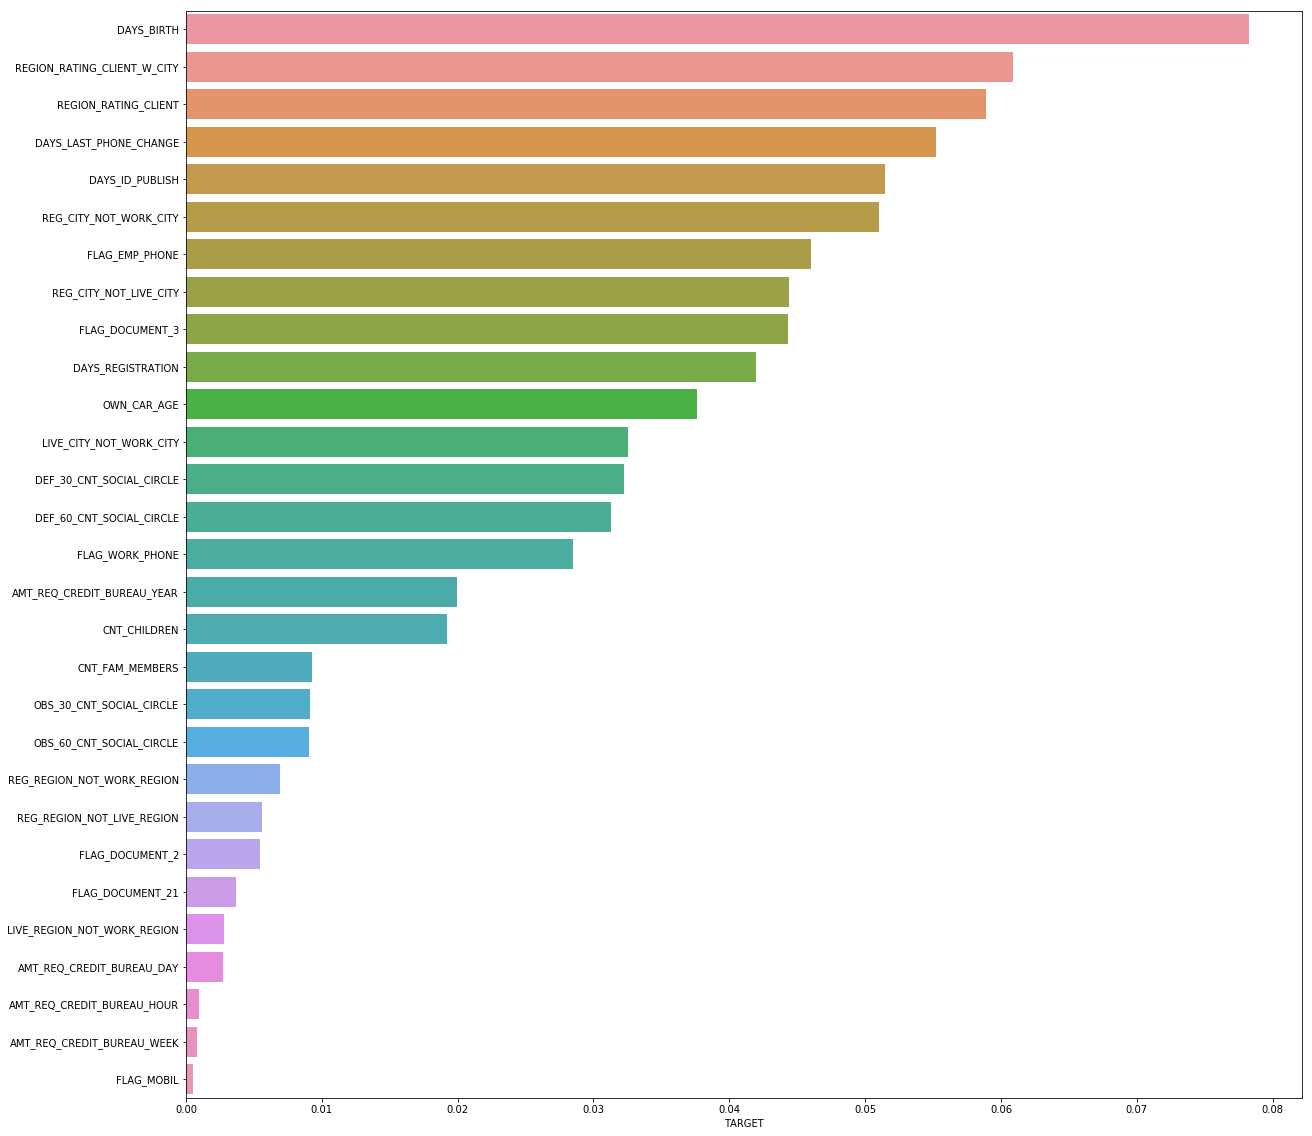

In [17]:
plt.figure(figsize = (20,20))
sns.barplot(x=high_corr.TARGET[1:], y=high_corr.index[1:])

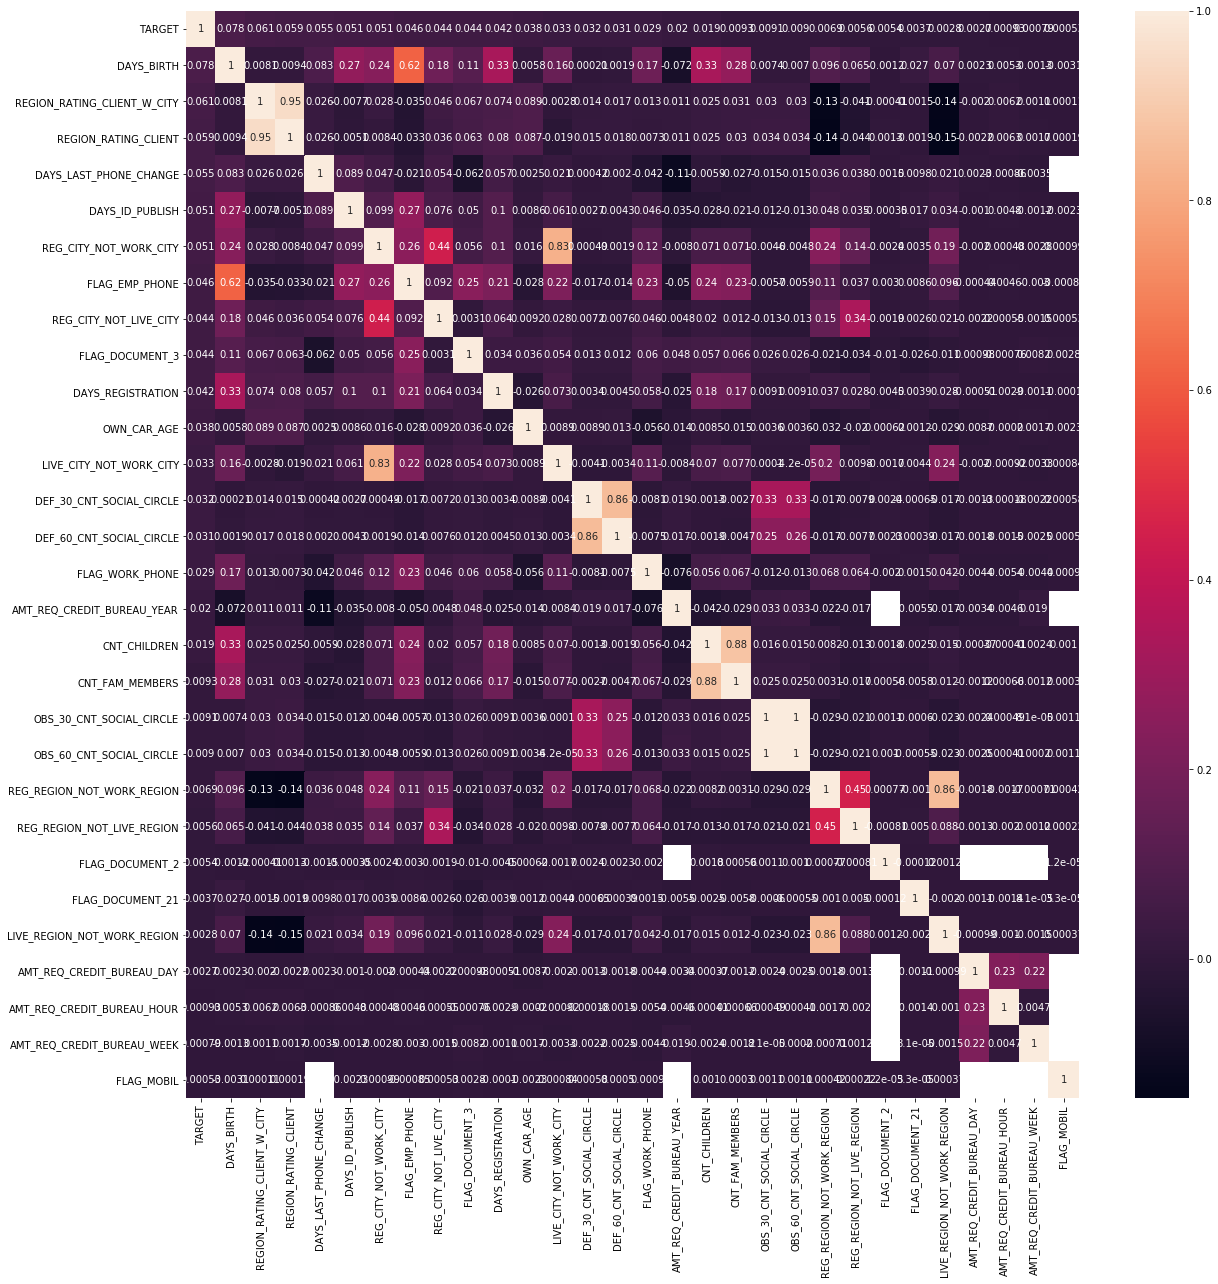

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(
    high_corr[high_corr.index],
    annot=True,
    cbar=True
)

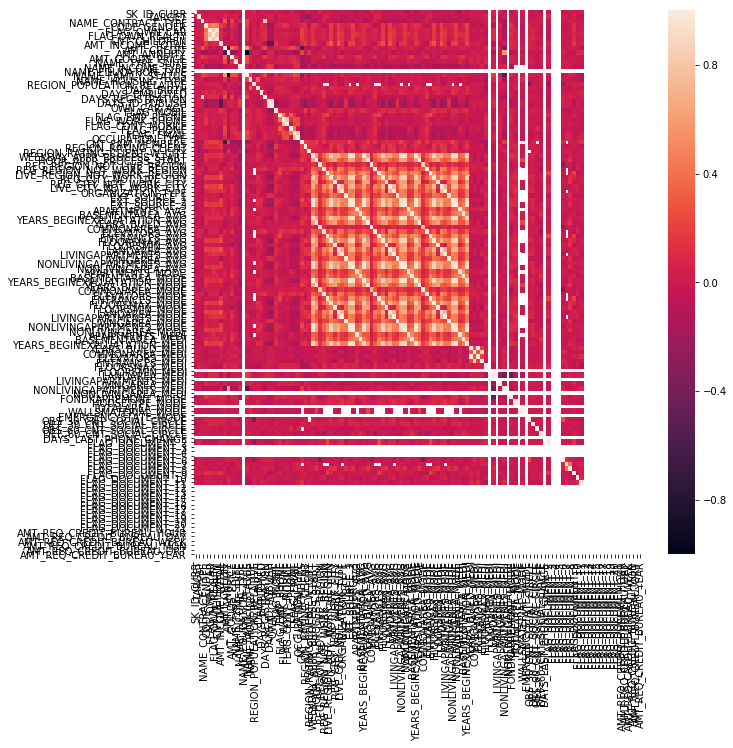

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(
    train_eda.corr(),
    xticklabels=train.columns.values,
    yticklabels=train.columns.values,
    annot_kws={ 'size': 20 }
)

In [20]:
categ_feats = [f for f in train.columns if train[f].dtype == 'object']
train[categ_feats].agg('nunique')

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

/home/arizuka/.pyenv/versions/3.6.4/envs/compe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


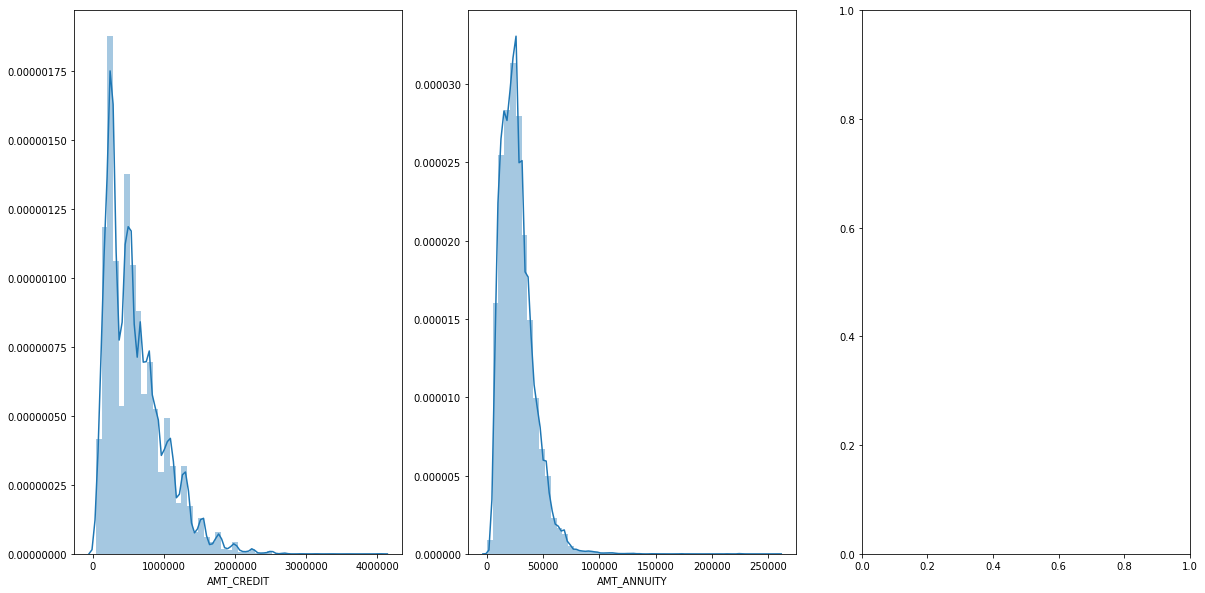

In [21]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 10))

sns.distplot(train['AMT_CREDIT'].fillna(-1), ax=ax[0])
sns.distplot(train['AMT_ANNUITY'].fillna(-1), ax=ax[1])

/home/arizuka/.pyenv/versions/3.6.4/envs/compe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


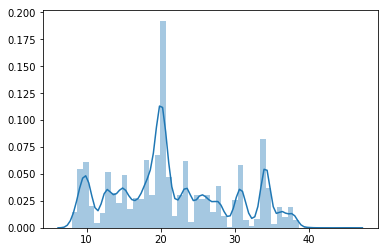

In [22]:
payment_times = train['AMT_CREDIT'].fillna(0)/train['AMT_ANNUITY'].fillna(-1)
sns.distplot(payment_times[payment_times > 0])

/home/arizuka/.pyenv/versions/3.6.4/envs/compe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


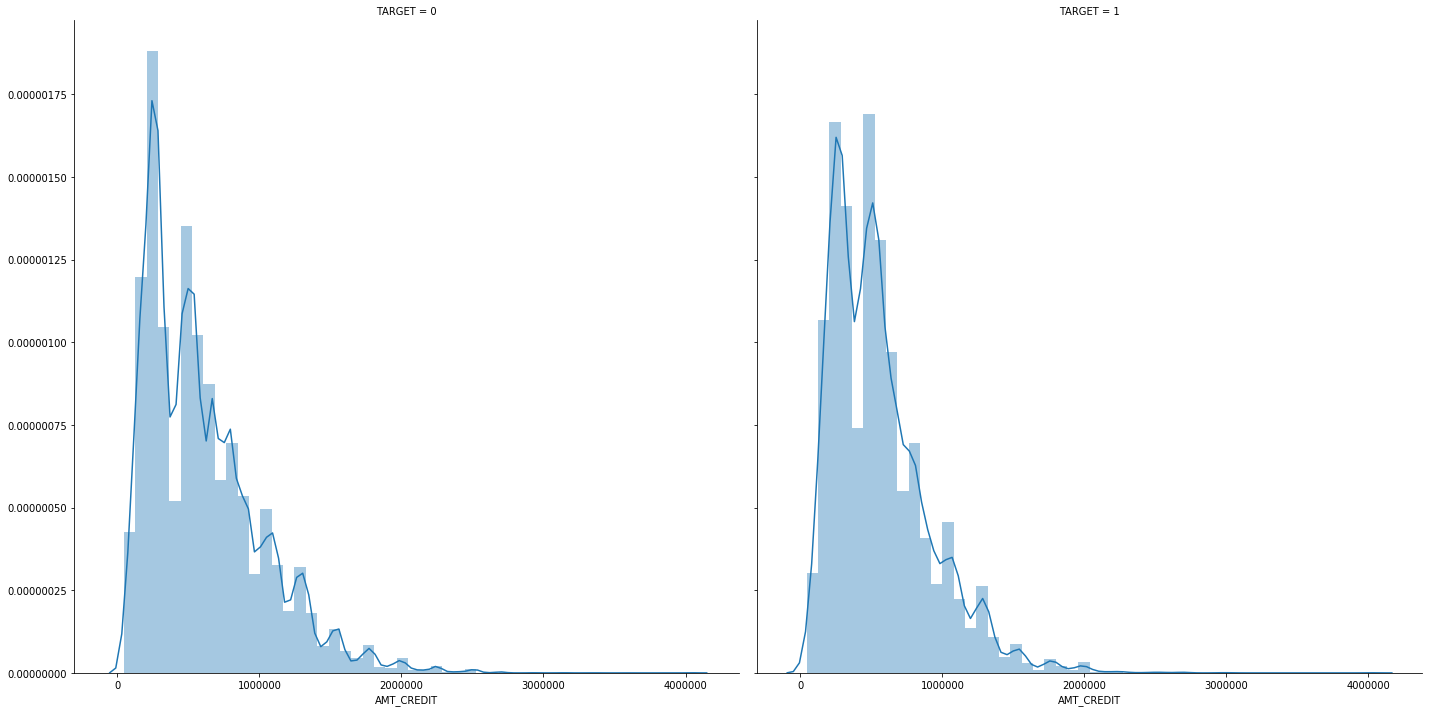

In [23]:
g = sns.FacetGrid(train, col='TARGET', size=10)
g.map(sns.distplot, 'AMT_CREDIT')

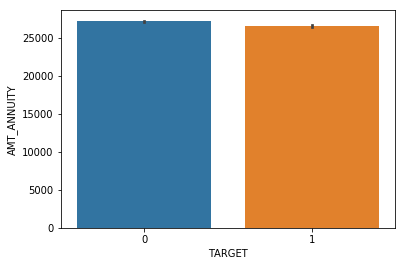

In [24]:
payment_times = train['AMT_CREDIT'].fillna(train['AMT_CREDIT'].mean())/train['AMT_ANNUITY'].fillna(train['AMT_ANNUITY'].mean())
sns.barplot(x=train.TARGET, y=train.AMT_ANNUITY)
# sns.barplot(x=train.TARGET, y=payment_times)

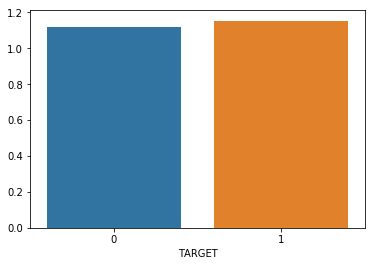

In [25]:
goods_price_ratio = (train.AMT_CREDIT/train.AMT_GOODS_PRICE).dropna()
sns.barplot(x=train.TARGET.iloc[goods_price_ratio.index], y=goods_price_ratio)


# sns.distplot(goods_price_ratio[goods_price_ratio < 2])
# sns.distplot(train.AMT_CREDIT)

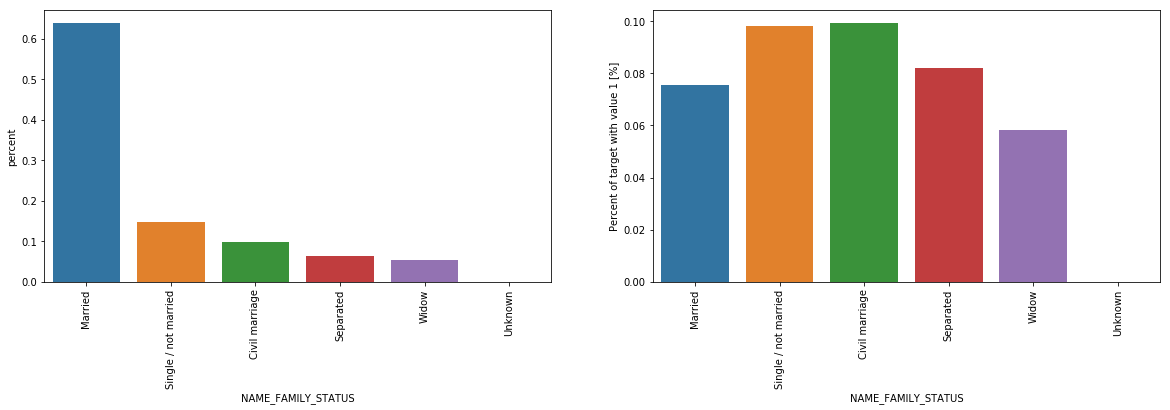

In [26]:
# utils.plot.percentage_plot(x='NAME_FAMILY_STATUS', data=train)
utils.plot.percentage_plot2(x='NAME_FAMILY_STATUS', data=train)

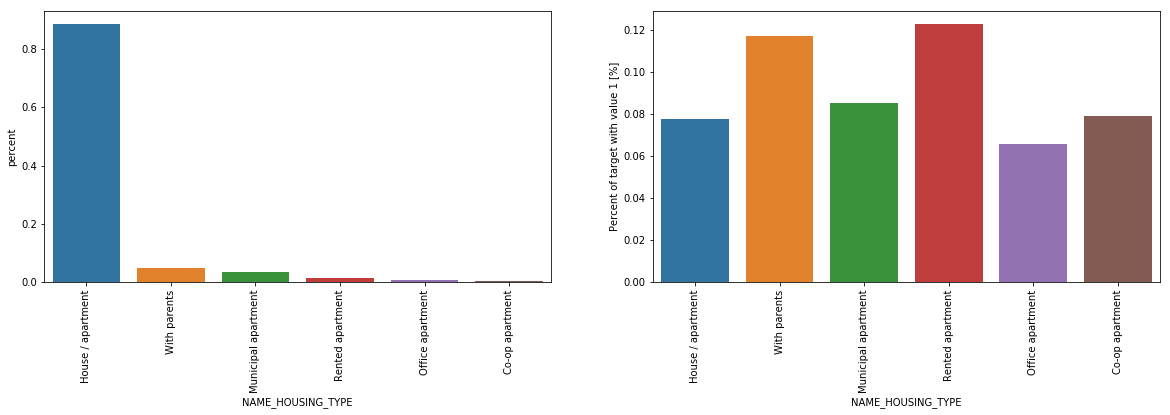

In [27]:
utils.plot.percentage_plot2(x='NAME_HOUSING_TYPE', data=train)

/home/arizuka/.pyenv/versions/3.6.4/envs/compe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


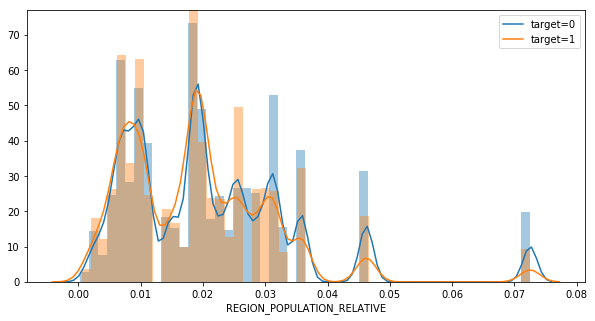

In [28]:
utils.plot.distplot(train, 'REGION_POPULATION_RELATIVE')

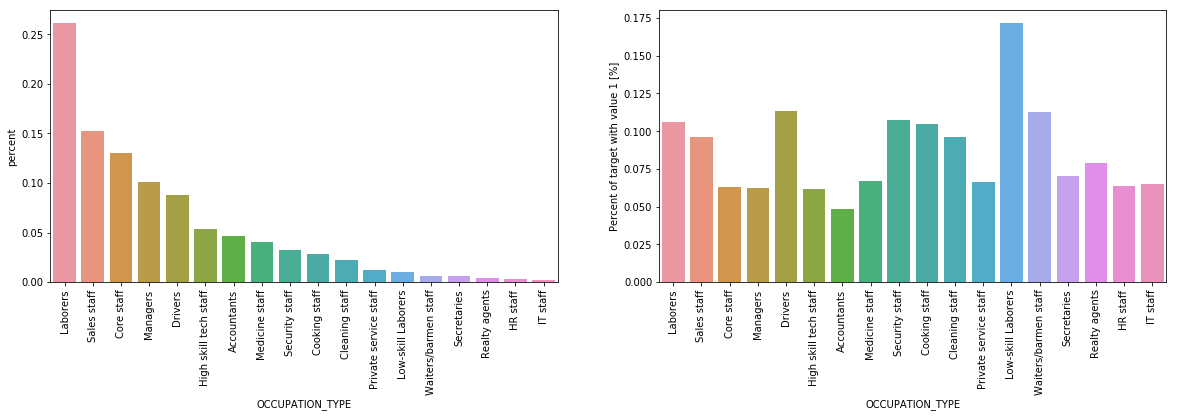

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [29]:
utils.plot.percentage_plot2(x='OCCUPATION_TYPE', data=train)
train['OCCUPATION_TYPE'].value_counts()

/home/arizuka/.pyenv/versions/3.6.4/envs/compe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


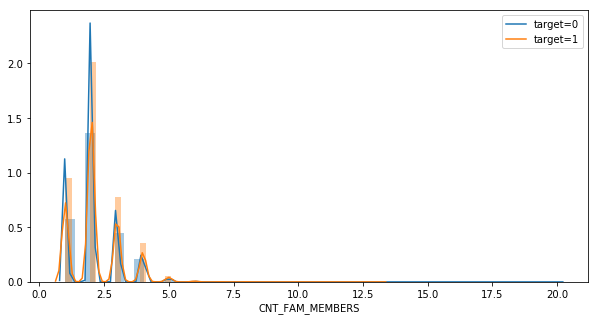

In [30]:
utils.plot.distplot(train, 'CNT_FAM_MEMBERS')

## 申請時間関連
* 深夜帯は遅延率が高い
* 月曜は健全？

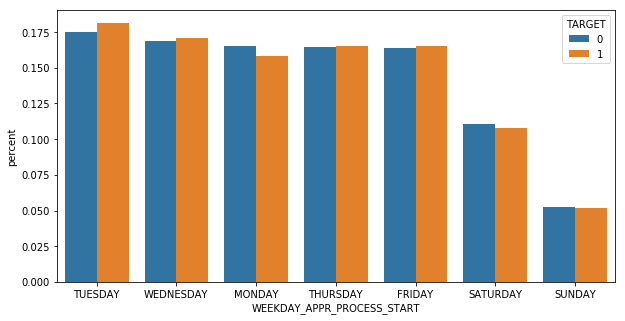

In [31]:
utils.plot.percentage_plot(train, 'WEEKDAY_APPR_PROCESS_START')

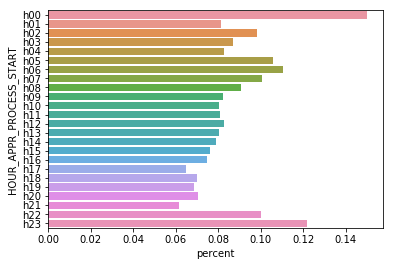

In [32]:
x = 'HOUR_APPR_PROCESS_START'
hour_appr = utils.plot.target_percentage(data=train, x=x)
hour_appr.head()
hour_appr[x] = hour_appr[x].apply(lambda h : f"h{h:02d}")
# hour_appr = hour_appr.sort_values(by=[x])
hour_appr.head()
sns.barplot(y=x, x='percent', order=np.sort(hour_appr[x].values), data=hour_appr)

# 偽装の疑い
flagsが偽装っぽい

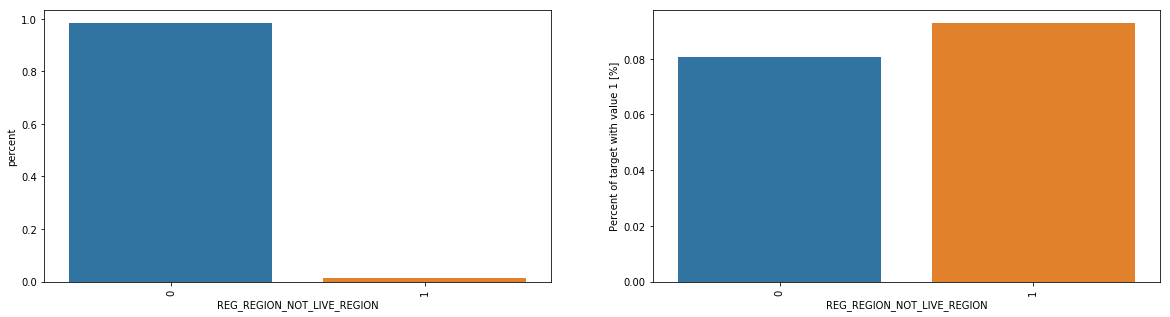

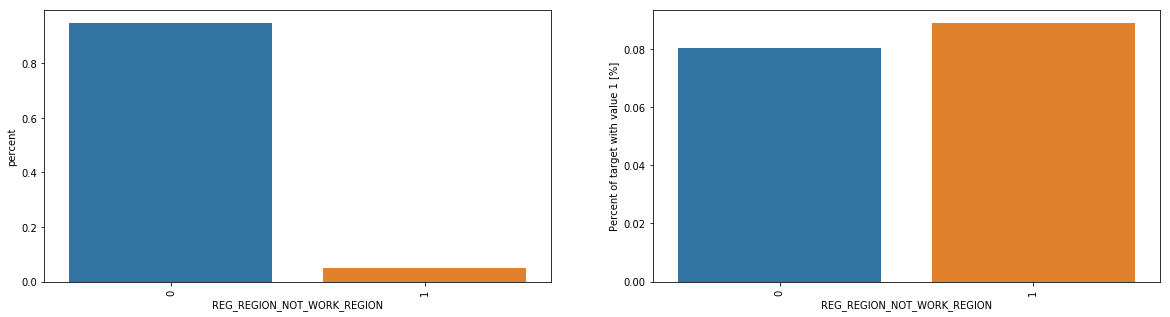

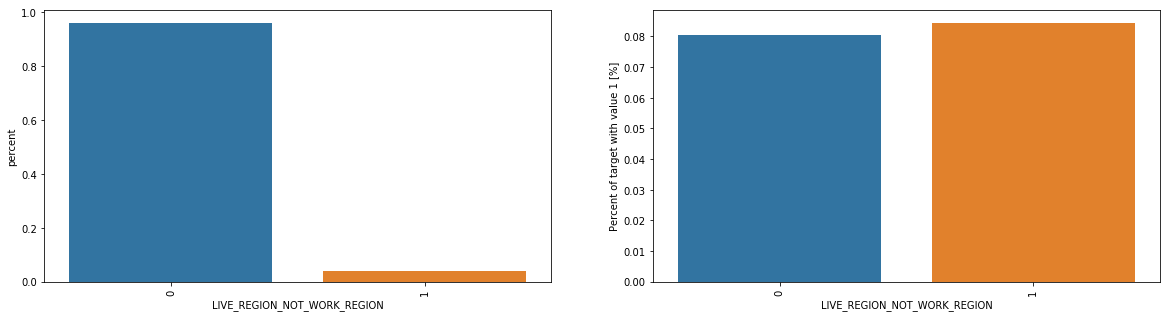

In [33]:
utils.plot.percentage_plot2(train, 'REG_REGION_NOT_LIVE_REGION')
utils.plot.percentage_plot2(train, 'REG_REGION_NOT_WORK_REGION')
utils.plot.percentage_plot2(train, 'LIVE_REGION_NOT_WORK_REGION')


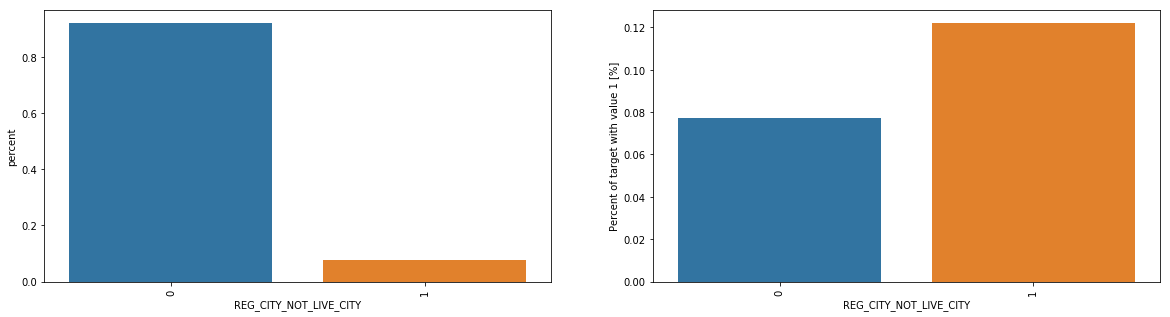

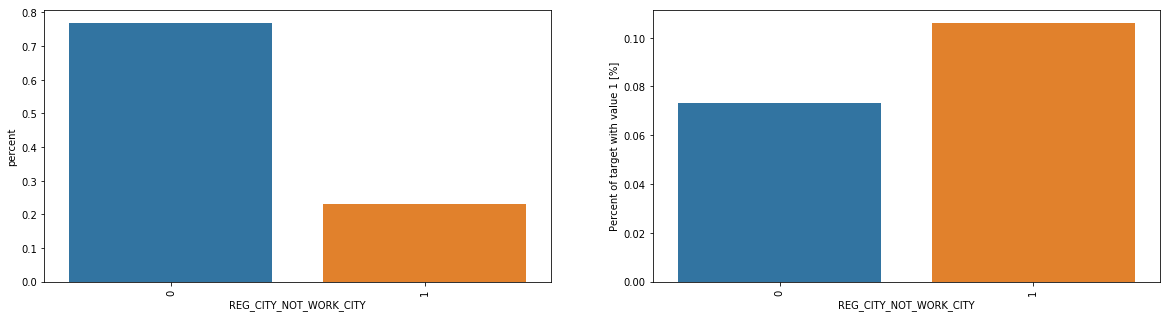

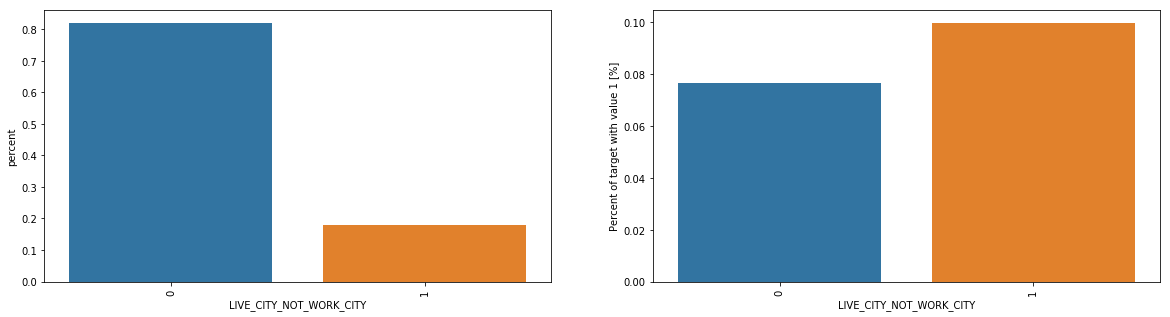

In [34]:
utils.plot.percentage_plot2(train, 'REG_CITY_NOT_LIVE_CITY')
utils.plot.percentage_plot2(train, 'REG_CITY_NOT_WORK_CITY')
utils.plot.percentage_plot2(train, 'LIVE_CITY_NOT_WORK_CITY')

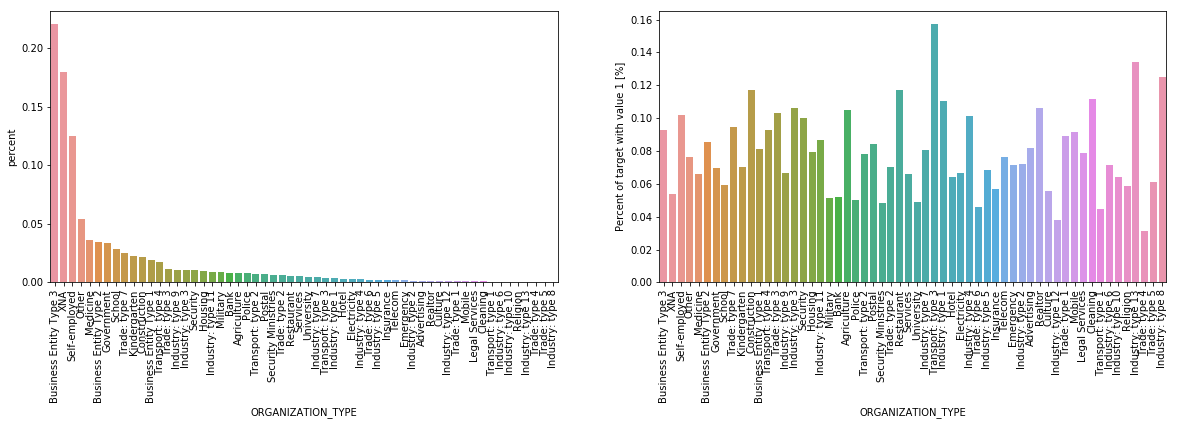

In [35]:
utils.plot.percentage_plot2(train, 'ORGANIZATION_TYPE')

/home/arizuka/.pyenv/versions/3.6.4/envs/compe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


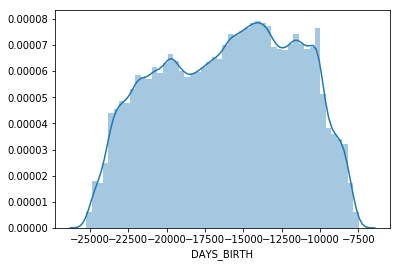

In [38]:
sns.distplot(train['DAYS_BIRTH'])

# document

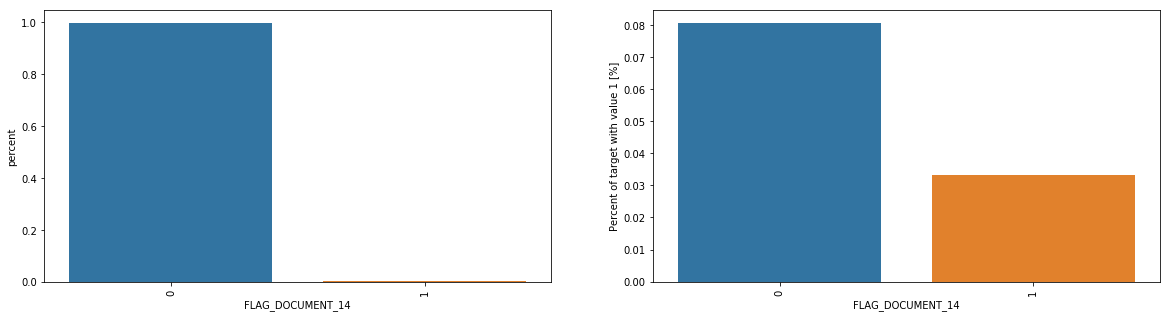

In [75]:
utils.plot.percentage_plot2(train, 'FLAG_DOCUMENT_14')